# Task is to first do standard scaling i.e. feature engg and then validate the model using k fold cross validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Churn = pd.read_csv('D:/iAnalyst/Machine Learning/Logistic Regression/Churn_Modelling.csv')
df=Churn.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Exploratory Data Analysis

In [3]:
Churn.isnull() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

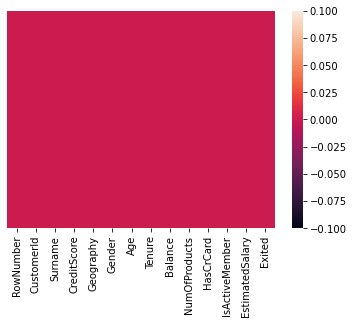

In [4]:
sns.heatmap(df.isnull(),yticklabels=False)#,cbar=True,cmap='viridis')   #no missing cases

<AxesSubplot:xlabel='Exited', ylabel='count'>

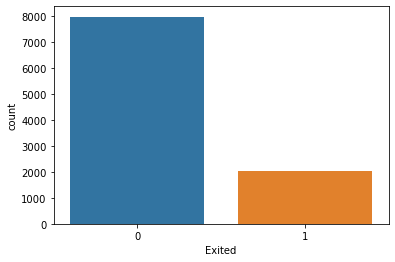

In [5]:
sns.countplot(x='Exited',data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

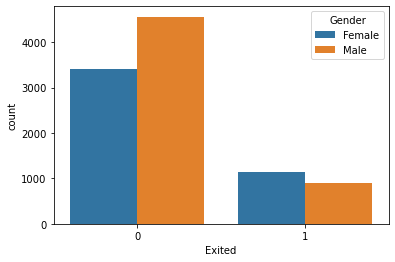

In [6]:
sns.countplot(x='Exited',hue='Gender',data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

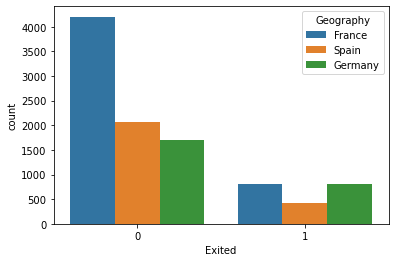

In [7]:
sns.countplot(x='Exited', hue='Geography', data=df)

Data cleaning

In [8]:
to_drop=['RowNumber','CustomerId','Surname']   #not needed
df=df.drop(to_drop,axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Gender', ylabel='Balance'>

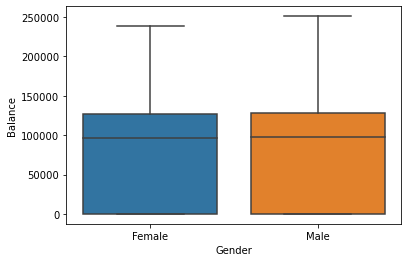

In [9]:
sns.boxplot(x='Gender',y='Balance',data=df)

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

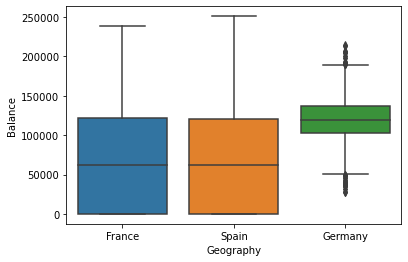

In [10]:
sns.boxplot(x='Geography',y='Balance',data=df)

##Using standardize feature engineering.

##using it for estimated salary

In [11]:
std_est_sal=(df.EstimatedSalary-df.EstimatedSalary.mean())/df.EstimatedSalary.std()

In [12]:
std_est_sal[:10]

0    0.021885
1    0.216523
2    0.240675
3   -0.108912
4   -0.365258
5    0.863607
6   -1.565409
7    0.334837
8   -0.437307
9   -0.493206
Name: EstimatedSalary, dtype: float64

In [13]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)   #It uses one-hot encoding. Convert categorical variable into dummy/indicator variables.
Geo = pd.get_dummies(df['Geography'],drop_first=True)   #we use drop first as we delete the first column generated. If we get male=0 then it is known that person is female. so no need for another column to mention female=1. Hence deleting this unnecessary coln.

In [14]:
Geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [15]:
df.drop(['Gender','Geography'],axis=1,inplace=True)  #deleting the existing colmns and adding the one-hot encoded ones.
pd.concat([df,Gender,Geo],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [17]:
##BUILDING A LOGISTIC REGRESSION MODEL

In [18]:
##kfold

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold 
from sklearn.metrics import roc_auc_score

kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 


X=df.drop('Exited',axis=1)
Y=df['Exited']

for train_index, test_index in kf.split(df):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   #we take iloc as we have train index as rows
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    logmodel = LogisticRegression(solver='liblinear')  #you can keep default= blank
    
    logmodel.fit(X_train,y_train)  
    predict= logmodel.predict(X_test)
    
    print(roc_auc_score(y_test, predict))  #calculating roc scores for each model

0.5198256604506605
0.5133640258328537
0.5164437012263099
0.521215144349197
0.5185443809729755


Training and PRedicting

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [22]:
logmodel.coef_

array([[-4.93550832e-03,  4.22575948e-02, -1.56024104e-03,
         3.54912815e-06, -5.50784718e-04, -1.61409066e-04,
        -1.44193514e-03, -1.39021843e-06]])

In [23]:
predictions = logmodel.predict(X_test) 
#predictions = logmodel.predict_proba(X_test)

In [24]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
pd.crosstab(predictions,y_test)

Exited,0,1
row_0,,
0,1554,400
1,24,22


Evaluation

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,predictions))

[[1554   24]
 [ 400   22]]


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1578
           1       0.48      0.05      0.09       422

    accuracy                           0.79      2000
   macro avg       0.64      0.52      0.49      2000
weighted avg       0.73      0.79      0.71      2000



In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
logit_roc_auc

0.5184617879732579

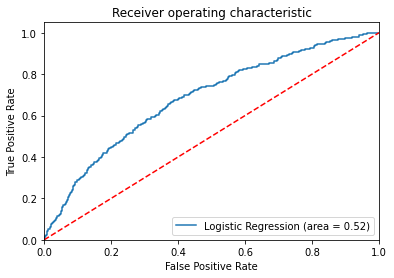

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [31]:
roc_auc_score(y_test, logmodel.predict(X_test))

0.5184617879732579

In [32]:
logmodel.predict_proba(X_test)

array([[0.75813438, 0.24186562],
       [0.87781808, 0.12218192],
       [0.74193093, 0.25806907],
       ...,
       [0.75050498, 0.24949502],
       [0.9507623 , 0.0492377 ],
       [0.91085076, 0.08914924]])

In [33]:
logmodel.predict_proba(X_test)[:,1]

array([0.24186562, 0.12218192, 0.25806907, ..., 0.24949502, 0.0492377 ,
       0.08914924])

In [34]:
logmodel.predict_proba(X_test)[:,1]>0.4

array([False, False, False, ..., False, False, False])

In [35]:
logical=logmodel.predict_proba(X_test)[:,1]>0.21
logical

array([ True, False,  True, ...,  True, False, False])

In [36]:
pred=[0]*np.size(logical)
for i in np.arange(0,np.size(logical)):
        if logical[i]==True:
            pred[i]=1   

In [37]:
roc_auc_score(y_test,pred) 

0.6369962577862673

In [38]:
print(confusion_matrix(y_test,pred))

[[997 581]
 [151 271]]


In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      1578
           1       0.32      0.64      0.43       422

    accuracy                           0.63      2000
   macro avg       0.59      0.64      0.58      2000
weighted avg       0.75      0.63      0.67      2000



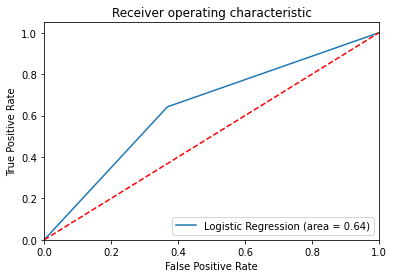

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()